# NLP 2025
# Lab 3: Attention and Pre-trained Models

Our practical journey in NLP has so far covered the following:

🧪 Lab 1: Tokenize and pre-process text in different ways.

🧠 Lab 2: Train different representation models (e.g. TF-IDF) and/or use pre-trained word embeddings with useful applications (such as information retrieval).

🚀 We will now escalate from using pre-trained static word embeddings to use pre-trained models (like BERT). The model is pre-trained on vast amounts of data 📚 and that allows for better generalization. As we discussed in class, BERT models are based on transformers 🤖, which use attention to model sequences (in our case sequences of words).

💡 BERT provides for contextualized embeddings, aka the embedding vector of a word is only determined once the actual context of that word is known. 👉 Practically, this allows for words to have different embedding vectors depending on their actual context (e.g. think of the word "bank" 🏦🏞️ and its multiple meanings in different contexts).

In this lab, we will learn how to load and use pre-trained models (e.g. BERT) from Huggingface 🤗.

By the end of this lab you should be able to:

- 🧠📦Load and/or use pre-trained models and tokenizers to solve different NLP tasks
- 🔍🧬 Inspect and analyze the inner workings (hidden layers etc.) of attention models (like BERT)
- 🧲📝 Use attention models to get sentence representations (aka sentence embeddings)
- 📚🎯 Use BERT sentence embeddings to solve more complicated tasks like information retrieval
- ⚖️📊 Compare performance of different models and assess their effectiveness
- 🛠️🐍 Load and use the basics of pytorch and huggingface transformers (important frameworks in NLP)

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 1      |
| [Exercise 2](#e2)   | 3      |
| [Exercise 3](#e3)   | 5      |
| [Exercise 4](#e4)   | 2      |
| [Exercise 5](#e5)   | 10     |
| [Exercise 6](#e6)   | 5      |
| [Exercise 7](#e7)   | 10     |
| [Exercise 8](#e8)   | 2      |
| [Exercise 9](#e9)   | 1      |
| [Exercise 10](#e10) | 3      |
| [Exercise 11](#e11) | 10     |
| [Exercise 12](#e12) | 3      |
| [Exercise 13](#e13) | 10     |
| [Exercise 14](#e14) | 10     |
| [Exercise 15](#e15) | 15     |
| [Exercise 16](#e16) | 10     |
| Total               | 100    |

This score will be scaled down to 1 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 2/May 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

## 0. Setup (Huggingface + PyTorch  = ❤️)

You should know the drill by now. As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below (if in Google Colab) or copy the code to the terminal (if you run locally):

In [ ]:
! pip install -U datasets

  Attempting uninstall: datasets
    Found existing installation: datasets 3.3.2
    Uninstalling datasets-3.3.2:
      Successfully uninstalled datasets-3.3.2


Next, we will need [PyTorch](https://pytorch.org/) installed. It is a very popular deep learning library that offers modularized versions of many of the sequence models we discussed in class. It's an important tool that you may want to practice further if you want to dive deeper into NLP, since much of the current academic and industrial research uses it.

Some resources to look further are given below.

* [Documentation](https://pytorch.org/docs/stable/index.html) (We will need this soon)

* [Installation Instructions](https://pytorch.org/get-started/locally/)

* [Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

The cell below should install the library:

In [ ]:
# ! pip install torch torchvision torchaudio

The last bit we need is the huggingface transformers library (here is the documentation [https://huggingface.co/docs/transformers/en/index](https://huggingface.co/docs/transformers/en/index)). Transformers are one of the most influential architectures in handling sequences (not only in language). As we discussed in lectures, they excel at taking into account context (which is the salt-and-pepper of NLP) with mechansisms such as self-attetion, which allows them to weigh the importance of different words in a sentence. If you want to know more, revisit the course material (slides and textbook).

We already used huggingface datasets in previous labs and huggingface transformers integrates nicely with that. Apart from the ease of use, huggingface is also providing pre-trained models of different kinds. The list can be found [here](https://huggingface.co/models) ([https://huggingface.co/models](https://huggingface.co/models)). The following line should be enough to install huggingface transformers library:

In [ ]:
# ! pip install transformers

As usual, we start by importing some essential Python libraries that we will be using.

In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt
import datasets
import transformers
import tqdm
import torch

## 1. Load and Preprocess Data

For easiness and comparison purposes, we will ue the same dataset as in the previous lab. That will help us re-visit the approach and see whether contextualized architectures can do better in the same problem/task/dataset.

As a reminder:

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf).

### 1.1 Loading the Dataset

The dataset will be loaded as a huggingface datgaset. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [ ]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [ ]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with a `train` split so we will have to split that into `train`/`test` ourselves with the line below.

In [ ]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


Note that previously, we had very much full control over the vocabulary of the dataset (in terms of pre-processing including tokenization). That is because we wanted to build our own embedding model.

By using a *pre-trained* model (like we are going to do at this lab), we need to adhere to the way this model was trained (including the tokenization). Huggingface provides the models, along with the relevant tokenizers, therefore cleaning is not necessary (as in previous labs). You can still include it if you think this would improve the results of the retrieval in the later parts of the lab.

<a name='e1'></a>
### Exercise 1 Unpacking the set
(1p) Instead of cleaning, we will unpack the `set` (containing tuples of full and compressed sentences) column into separate `sentence` and `compressed` columns. This will make it a bit easier for us later.

One key difference in this function is the fact that it will accept a batch of examples (instead of a single example in the exercises in the previous lab). You can iterate through the examples this way:

```
for set in examples['set']
```

The new columns should be lists containing strings (full or compressed sentences) extracted from the `set` column.

Fill in the function below to complete this task

In [ ]:
def unpack(examples):
    """
    Unpacks the column `set` into two columns `sentence` and `compressed`.
    Args:
        examples: a batch of examples from the dataset

    Returns: modified examples with two new columns: `sentence` and `compressed`

    """
    sentences = []
    compressed_sentences = []

    ### YOUR CODE HERE
    for set in examples['set']:
        sentences.append(set[0])
        compressed_sentences.append(set[1])

    ### YOUR CODE ENDS HERE

    examples['sentence'] = sentences
    examples['compressed'] = compressed_sentences
    return examples

In the next cell, we will apply the `unpack` function to the whole dataset. Notice that we also drop the original `set` column.

In [ ]:
split_ds = split_ds.map(unpack, batched=True, remove_columns=['set'])
print(split_ds)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted.

In [ ]:
for i in range(10):
    print(split_ds['train'][i])

{'sentence': 'A Cape Coral man was arrested after he urinated in front of a police officer outside a pool hall early Sunday, police said.', 'compressed': 'Man arrested for urinating in front of officer outside pool hall'}
{'sentence': 'Guitarist and songwriter Stephen Bruton, who had played with Kris Kristofferson for nearly 40 years and whose songs had been recorded by Bonnie Raitt, Willie Nelson, Jimmy Buffett and others, died May 9 of complications of throat cancer in Los Angeles.', 'compressed': 'Musician Stephen Bruton dies'}
{'sentence': 'One Australian has been injured in a Bangkok nightclub fire that killed more than 50 people.', 'compressed': 'Australian among injured in Bangkok'}
{'sentence': 'A St. Paul chiropractor has been charged with criminal sexual conduct after allegedly giving an employee an inappropriate massage.', 'compressed': 'Chiropractor charged for sexual conduct'}
{'sentence': 'ESPN reported that legendary former Georgetown coach John Thompson recently reached

In this lab, we will be using only pre-trained models. That means that we won't be training any new model. This is the reason we can select only the `test` subset for the rest of the notebook (this is where we will be assessing the performance of the pre-trained models). At the same time, we will save much time, as we will not be processing the `train` subset.

In [ ]:
test_ds = split_ds['test']
print(test_ds)

Dataset({
    features: ['sentence', 'compressed'],
    num_rows: 36000
})


### 1.2 Loading the Tokenizer

For the first part of this lab, we will be using a pre-trained BERT model from Huggingface, namely the [BERT Uncased](https://huggingface.co/google-bert/bert-base-uncased). You can read the original paper that introduced this model [here](https://aclanthology.org/N19-1423.pdf). This paper has been once of the most cited papers ever (currently having more than 100,000 citations).

We will specify the model name that can be found on the model's card on huggingface (revisit the first link). Make sure to check what other information Huggingface is offering (e.g. how to use the model, limitations, how to inference, etc.).

In [ ]:
model_name = 'google-bert/bert-base-uncased'

The models on huggingface come with their own tokenizers. They are loaded separately from the models. We can use [AutoTokenizer](https://huggingface.co/docs/transformers/v4.40.2/en/model_doc/auto#transformers.AutoTokenizer)'s `from_pretrained()` method to load it.

Inspect the output: The loaded object is of `BertTokenizerFast` class. Check the documentation [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast).

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


Next, let's see how we can use it to tokenize some text.

In [ ]:
print(test_ds[0]['sentence'])
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt')
print("---")
print(type(tokenized))
print("---")
print(tokenized)

Meryl Streep has been nominated for a Bafta for her portrayal of Margaret Thatcher in The Iron Lady just a day after winning a Golden Globe and as she waits to discover if she's won an Oscar.
---
<class 'transformers.tokenization_utils_base.BatchEncoding'>
---
{'input_ids': tensor([[  101, 21442,  8516,  2358,  9910,  2361,  2038,  2042,  4222,  2005,
          1037, 22284,  2005,  2014, 13954,  1997,  5545, 21127,  1999,  1996,
          3707,  3203,  2074,  1037,  2154,  2044,  3045,  1037,  3585,  7595,
          1998,  2004,  2016, 18074,  2000,  7523,  2065,  2016,  1005,  1055,
          2180,  2019,  7436,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


Examine the outputs: The tokenizer returned three things:
- `input_ids` - this is a PyTorch tensor ([https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html)) with the indices of our tokens. PyTorch tensors are similar to numpy arrays. They hold data in a multidimensional array or matrix. The difference is that PyTorch tensors can be placed and modified on the GPU which greatly improves the speed of execution.
- `token_type_ids` - this tensor holds the information about the index of the sentence. This has to do with the classification objective from the original paper, where two sentences were given and the model had to predict if they are connected. Because we only included a single sentence, we have only zeros here. We will not be concerned with it in this lab.
- `attention_mask` - holds the mask that the model will use to determine if the tokens in the `input_ids` are the real tokens or *padding*. Padding is a technique used to ensure that all input sequences have the same length. BERT (like many other NLP models) process data in batches and requires each sequence in a batch to have the same length, so sequences that are shorter than the maximum sequence length in the batch are padded with special tokens. In this case, because we only inputted a single sentence, the mask contains only ones. Later you will see examples where this is not the case.

Let's see how exactly the sentence was tokenized and how we can retrieve the original text. Notice that some words have been split into multiple tokens (remember when we discussed sub-word tokenization in class?). Also pay attention to the added special tokens, namely `CLS` and `SEP`:

The `[CLS]` token is a special classification token added at the beginning of every input sequence. It stands for "classification" (daah!) and is used by BERT to aggregate information from the entire sequence. The final hidden state corresponding to this token (after passing through the transformer layers) is used as the aggregate sequence representation for classification tasks. We will use this later in the lab!

The `[SEP]` token is used to separate different segments or sentences within the input sequence. It stands for "separator" (daaah again!).

In [ ]:
print(tokenized['input_ids'].shape)
print("---")
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print("---")
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0]))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

torch.Size([1, 45])
---
['[CLS]', 'mer', '##yl', 'st', '##ree', '##p', 'has', 'been', 'nominated', 'for', 'a', 'bafta', 'for', 'her', 'portrayal', 'of', 'margaret', 'thatcher', 'in', 'the', 'iron', 'lady', 'just', 'a', 'day', 'after', 'winning', 'a', 'golden', 'globe', 'and', 'as', 'she', 'waits', 'to', 'discover', 'if', 'she', "'", 's', 'won', 'an', 'oscar', '.', '[SEP]']
---
45
---
[CLS] meryl streep has been nominated for a bafta for her portrayal of margaret thatcher in the iron lady just a day after winning a golden globe and as she waits to discover if she ' s won an oscar. [SEP]
---
meryl streep has been nominated for a bafta for her portrayal of margaret thatcher in the iron lady just a day after winning a golden globe and as she waits to discover if she ' s won an oscar.


Tokenizer can process a list of sentences. This will create a batched output with tensor's first dimension corresponding to the batch size (the number of sentences we passed to the tokenizer). Examine the following cell and make sure it makes sense to you.

In [ ]:
print(test_ds[0:3]['sentence'])
tokenized = tokenizer(test_ds[0:3]['sentence'], padding=True, return_tensors='pt')
print(tokenized)
print(tokenized['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print(tokenizer.decode(tokenized['input_ids'][0]))
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

["Meryl Streep has been nominated for a Bafta for her portrayal of Margaret Thatcher in The Iron Lady just a day after winning a Golden Globe and as she waits to discover if she's won an Oscar.", 'Two scandal-hit hospital trusts have been ordered to improve standards or face fines or even the closure of services under a new hard hitting system of regulation.', "New York Yankees' closer Mariano Rivera, tore a knee ligament during batting practice earlier today."]
{'input_ids': tensor([[  101, 21442,  8516,  2358,  9910,  2361,  2038,  2042,  4222,  2005,
          1037, 22284,  2005,  2014, 13954,  1997,  5545, 21127,  1999,  1996,
          3707,  3203,  2074,  1037,  2154,  2044,  3045,  1037,  3585,  7595,
          1998,  2004,  2016, 18074,  2000,  7523,  2065,  2016,  1005,  1055,
          2180,  2019,  7436,  1012,   102],
        [  101,  2048,  9446,  1011,  2718,  2902, 20278,  2031,  2042,  3641,
          2000,  5335,  4781,  2030,  2227, 21892,  2030,  2130,  1996,  8503,


<a name='e2'></a>
### Exercise 2 Questions about the tokenizer

Answer the following questions:
- (1p) What is the size of the vocabulary?
- (2p) What are the special tokens apart from `[CLS]` and `[SEP]`? What are their functions?

In [ ]:
print(tokenizer.vocab_size)

30522


The vocabulary size is 30522.

In [ ]:
print(tokenizer.special_tokens_map)

{'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}


1.   [PAD]-Padding-Used to fill shorter sequences in a batch to the same length.
2.   [MASK]-Masking-Used during training for the masked language modeling (MLM) task — BERT is trained to predict these.
3.   [UNK]-Unknown-Represents words not in the vocabulary.

### 1.4 Loading the Model

In this section, we will load and examine the model. We will start with selecting the device we will place the model on. This will be a GPU (if one is available) or a CPU.

Google Colab offers free access to GPU, provided there is availability (also baed on quotas which may vary based on your usage and the overall demand on Colab's resources). If you are working locally, then if you don't have a GPU, CPU will be selected. For the first parts of the assignment running on CPU might be okay but when we have to load the dataset a GPU will be necessary.

The following cell will select the device for us.

In [ ]:
print(torch.cuda.is_available())  # True = GPU is available

True


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cuda:0


Now, let's load the model from huggingface and place it (slowly because it's heavy due to the large number of parameters) on the device from the previous cell (the methods `to()`).

In [ ]:
model = transformers.AutoModel.from_pretrained(model_name)
model.to(device)
print(model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

<a name='e3'></a>
### Exercise 3 Questions about the Model

Examine the output of the previous cells. Answer the following questions:
- (1p) What is the number of transformer layers in this model?
- (1p) What is the dimension of the embeddings?
- (1p) What is the hidden size of the FFN in the transformer layer?
- (1p) What is the total number of parameters of the model (hint: check the `num_parameters()` method of the model)?
- (1p) How can you find the vocabulary size from the model?







1.   "(0-11): 12 x BertLayer" --> 12 transformer layers








2.   "(word_embeddings): Embedding(30522, 768, padding_idx=0)" --> 768. Each token is represented by a 768-element vector.




FFN = Feed-Forward Network.
This is the "middle layer" of the two-layer feed-forward part inside each transformer block.

3.   "(intermediate): BertIntermediate(
  (dense): Linear(in_features=768, out_features=3072)" --> 3072 is the hidden size of the FFN.




In [ ]:
# 3.4
total_params = sum(p.numel() for p in model.parameters())
print(total_params)


109482240




4.   the total number of parameters is about 110 million.




In [ ]:
# 3.5
print(model.embeddings.word_embeddings.num_embeddings)


30522


Next, let's use BERT model for inference. We will tokenize the first sentence of our dataset and pass it to the model. We set `output_hidden_states` to `True` in order to have access to the hidden states of the model. Those represent the latent representations after embedding and transformer layers.

In [ ]:
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)

{'input_ids': tensor([[  101, 21442,  8516,  2358,  9910,  2361,  2038,  2042,  4222,  2005,
          1037, 22284,  2005,  2014, 13954,  1997,  5545, 21127,  1999,  1996,
          3707,  3203,  2074,  1037,  2154,  2044,  3045,  1037,  3585,  7595,
          1998,  2004,  2016, 18074,  2000,  7523,  2065,  2016,  1005,  1055,
          2180,  2019,  7436,  1012,   102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}


Examine the next cell and make sure everything makes sense to you. Consult the [documentation](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel.forward) in case of doubt.

In [ ]:
print(list(model_output.keys()))
print(type(model_output['pooler_output']))
print(model_output['pooler_output'].shape)
print(type(model_output['hidden_states']))
print(len(model_output['hidden_states']))
print(type(model_output['hidden_states'][0]))
print(model_output['hidden_states'][0].shape)

['last_hidden_state', 'pooler_output', 'hidden_states']
<class 'torch.Tensor'>
torch.Size([1, 768])
<class 'tuple'>
13
<class 'torch.Tensor'>
torch.Size([1, 45, 768])


## 2. Exploring BERT hidden states

In this section we will look in more detail into the embeddings (latent representations) of BERT model. As a reminder, BERT embeddings a type of contextual word embeddings generated by the BERT model. They capture the meaning of words in the actual context. Notice the contrast with the static word embeddings we worked with in the previous lab: Then, we only needed a large corpus to compute word embeddings. In the case of BERT, we need to pass the actual sequence through the model to get the equivalent vector. More specifically, we tokenize the sentence (based on the relevant model and tokenizer), add the special tokanes (`CLS` and `SEP`, which are added authomatically by the tokenizer) and pass the sentence in the model.

<a name='e4'></a>
### Exercise 4 Plotting the layer-wise similarities between words

(2p) We will use the following function to plot the cosine similarity between tokens in different sentences. It takes `hidden_states` and `tokens_of_interest_ids` arguments. The `hidden_states` is a list of Tensors and contains the hidden states of the sentences. The size of the list is equal to the number of layers in the model (+1 for the initial embedding) and each element is a Tensor with the first dimension corresponding to the sentences in the batch and second to the tokens (see the previous code cell). The third dimension is the size of the embedding. The `tokens_of_interest_ids` is a list of integers of the size equal to the number of sentences. The integers are indices that identify tokens we want to compare with each other.

Fill in the function by first extracting the embeddings of the token-of-interest in a `layer` for two sentences `sent1` and `sent2`. Next, calculate the cosine similarity between the embeddings. You can use an existing PyTorch implementation of cosine similarity.

In [ ]:
from typing import List
from itertools import combinations


def plot_evolving_similarities(hidden_states: List[torch.Tensor], tokens_of_interest_ids: List[int]):
    """
    Plots the evolving cosine similarity between the hidden representation of tokens in different sentences.
    Hidden states are provided as a list of tensors where each tensor corresponds to the layer of the model.
    Each tensor contains the hidden representations of each token (second dimension) of each sentence (first dimension).
    For each sentence there have to be a token of interest (can be the same).
    Args:
        hidden_states: a list of tensors containing the hidden representations of sentences
        tokens_of_interest_ids: a list of indices of tokens of interest
    """
    assert hidden_states[0].shape[0] == len(tokens_of_interest_ids), \
        'The batch size of hidden_states must be equal to the number of tokens of interest'

    num_layers = len(hidden_states)
    num_sentences = len(tokens_of_interest_ids)
    # Creates a list of all possible combinations of sentences
    sentence_combinations = list(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]
    for layer in range(num_layers):
        for i, (sent1, sent2) in enumerate(sentence_combinations):

            ### YOUR CODE HERE
            # 1. Extract embeddings for the tokens of interest in the current layer for sent1 and sent2
            vec1 = hidden_states[layer][sent1, tokens_of_interest_ids[sent1], :]
            vec2 = hidden_states[layer][sent2, tokens_of_interest_ids[sent2], :]

            # 2. Compute the cosine similarity between the two embeddings

            dot_product = torch.dot(vec1, vec2)
            norm_vec1 = torch.linalg.norm(vec1)
            norm_vec2 = torch.linalg.norm(vec2)

            epsilon = 1e-8
            cosine_similarity_tensor = dot_product / (norm_vec1 * norm_vec2 + epsilon)
            cosine_similarity = cosine_similarity_tensor.item()

            ### YOUR CODE ENDS HERE

            similarities[i].append(cosine_similarity)

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i],
                 label=f'between {sent1 + 1} and {sent2 + 1}')
    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()

Here are three sentences with the word "bank". The word form is the same for all, however the meaning is different in the second sentence. Remember polysemy?

We can plot how the cosine similarity between the embeddings (and latent representations) of the word "bank" in each sentence evolves through the different layers of BERT.

The following code follows the procedure we described above.

{'input_ids': tensor([[  101,  2057,  2097,  6487,  1037,  2924,  2279,  2733,   999,   102,
             0,     0,     0],
        [  101,  1996,  2336, 16791,  6386,  2011,  1996,  2924,  1997,  1996,
          2314,  1012,   102],
        [  101,  1045,  2404,  2769,  1999,  1996,  2924,  1012,   102,     0,
             0,     0,     0]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], device='cuda:0')}
['[CLS]', 'we', 'will', 'rob', 'a', 'bank', 'next', 'week', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'the', 'children', 'skipped', 'stones', 'by', 'the', 'bank', 'of', 'the', 'river', '.', '[SEP]']
['[CLS]', 'i', 'put', 'money', 'in', 'the', 'bank', '.', '[SE

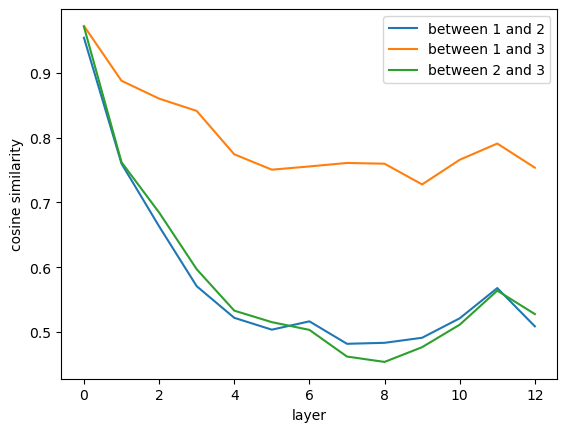

In [ ]:
text1 = "We will rob a bank next week!"
text2 = "The children skipped stones by the bank of the river."
text3 = "I put money in the bank."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [5, 7, 6]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

<a name='e5'></a>
### Exercise 5 Evolution of embeddings

- (3p) Discuss the plots above. Are the plots showing what you expected to see?
- (1p) Take a look at the similarity between the word "bank" in the first example for the first layer (layer index 0)? This corresponds to the embedding layer of BERT. It is close to `1` but not exactly. Why is that?
- (3p) Plot and analyze the similarities between words "nice", "bad", and "lovely" in the sentences "The weather is nice today.", "The weather is bad today.", and "The weather is lovely today.". Comment on the results. Are the plots showing what you expected to see?
- (3p) Try a different set of sentences and comment on the results.

# 5.1.
   
Yes, the plots are showing exactly what we expected to see based on how BERT generates contextual embeddings.

Each line in the plot represents the cosine similarity of the word "bank" in different sentence pairs as we go deeper into BERT's layers (from 0 to 12):

Sentence 1 vs 2 (rob a bank vs river bank)
--> The cosine similarity drops significantly, indicating that the model is learning to represent these two uses of "bank" differently — one in a criminal/financial context and the other in a geographic/natural one.
This is expected: same word, different meanings → low similarity as layers progress.

Sentence 1 vs 3 (rob a bank vs put money in the bank)
--> The similarity is consistently higher than for 1 vs 2, suggesting the model recognizes both uses as being related to a financial institution.
Expected: same meaning --> higher similarity even across different contexts.

Sentence 2 vs 3 (river bank vs financial bank)
--> Similarity is low, just like 1 vs 2. This confirms that the model is distinguishing the natural meaning from the financial one.




# 5.2

The similarity between the word "bank" in the first layer (layer index 0) is close to 1 because at this stage BERT has not yet applied any self-attention or contextualization. Layer 0 corresponds to the output of the embedding layer, which provides a static vector for each token based on its identity in the vocabulary. Since the word "bank" is the same across all three sentences, its initial embedding vector is nearly identical in each case.

However, the similarity is not exactly 1 because the full input representation at this point is the sum of three components: the token embedding, the segment (token type) embedding, and the positional embedding. The token embedding is the same for "bank" across sentences, but the positional embeddings differ because "bank" appears at different positions in each sentence. This small difference in position causes the resulting embedding vectors to be slightly different, which explains why the cosine similarity is very close to but not exactly 1.


## 5.3

In [ ]:
### YOUR CODE HERE
text1 = "The weather is nice today."
text2 = "The weather is bad today."
text3 = "The weather is lovely today."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])

print(tokens1)
print(tokens2)
print(tokens3)

### YOUR CODE ENDS HERE
### NOTICE: you can always add more cells if you need them

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 2919, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 8403, 2651, 1012,  102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
['[CLS]', 'the', 'weather', 'is', 'nice', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'bad', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'lovely', 'today', '.', '[SEP]']


nice
bad
lovely


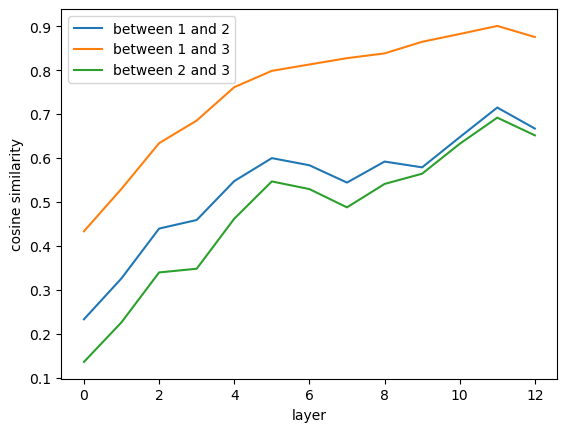

In [ ]:
tokens_ids_of_interest = [4, 4, 4]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

The plot shows the cosine similarities between the contextual embeddings of the words "nice", "bad", and "lovely" in the sentences “The weather is nice today.”, “The weather is bad today.”, and “The weather is lovely today.” as they evolve through the layers of BERT.

The similarity between "nice" and "lovely" (sentence 1 and 3) is the highest across all layers, reaching close to 0.9 in the upper layers. This makes sense because both words are positive adjectives describing the weather, and are often used in similar contexts. BERT correctly learns that they have similar meanings when placed in the same sentence structure.

The similarity between "nice" and "bad" (sentence 1 and 2) is lower, although it increases through the layers. This is expected, since both words are adjectives modifying "weather", but with opposite sentiment. The model likely recognizes some structural or syntactic similarity, but separates them due to their different polarity.

The lowest similarity overall is between "bad" and "lovely" (sentence 2 and 3), especially in the early layers. This also matches expectations since these two words are semantically quite different and convey opposite sentiment. However, the similarity still increases with layer depth, likely because they occupy similar grammatical roles in similar sentence structures, and both relate to weather conditions.

Overall, the plot shows what we expected. The model starts with relatively low similarity between all pairs (since the words are different) and becomes more semantically aware in deeper layers, especially in identifying similarity between words with positive meaning ("nice" and "lovely") while keeping those with opposite sentiment more distinct. This confirms that BERT is capturing contextual and semantic information layer by layer.

# 5.4


A good follow-up test would be to explore contextual meanings of a word that can shift part-of-speech or syntactic role, rather than just sentiment. A classic example is the word "run", which can be used both as a verb and as a noun.

Sentences:

"I like to run every morning." (verb)

"She went for a run in the park." (noun)

"The program will run at startup." (verb, technical context)

In [ ]:
text1 = "I like to run every morning."
text2 = "She went for a run in the park."
text3 = "The program will run at startup."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])

print(tokens1)
print(tokens2)
print(tokens3)

{'input_ids': tensor([[  101,  1045,  2066,  2000,  2448,  2296,  2851,  1012,   102,     0,
             0],
        [  101,  2016,  2253,  2005,  1037,  2448,  1999,  1996,  2380,  1012,
           102],
        [  101,  1996,  2565,  2097,  2448,  2012, 22752,  1012,   102,     0,
             0]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]], device='cuda:0')}
['[CLS]', 'i', 'like', 'to', 'run', 'every', 'morning', '.', '[SEP]', '[PAD]', '[PAD]']
['[CLS]', 'she', 'went', 'for', 'a', 'run', 'in', 'the', 'park', '.', '[SEP]']
['[CLS]', 'the', 'program', 'will', 'run', 'at', 'startup', '.', '[SEP]', '[PAD]', '[PAD]']


run
run
run


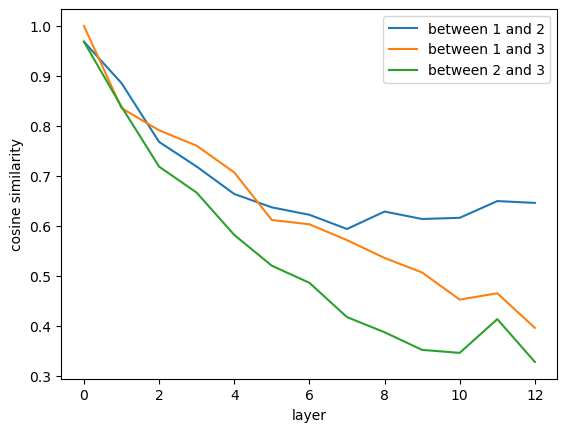

In [ ]:
tokens_ids_of_interest = [4, 5, 4]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

In the early layers (especially layer 0), the similarity between all sentence pairs is very high. This is expected, as the initial embedding layer mainly reflects the identity of the token “run” with minimal contextual influence.

As we go deeper into the layers, the similarities begin to diverge:

The similarity between sentence 1 and sentence 2 drops steadily. This makes sense because sentence 1 uses "run" as a verb (“to run”), while sentence 2 uses it as a noun (“a run”). These differences in grammatical function are picked up by BERT in deeper layers.

The similarity between sentence 1 and sentence 3 also decreases, but it remains slightly higher than 1 vs 2 for most layers. Both use “run” as a verb, although in very different contexts (physical activity vs program execution). This suggests that BERT is sensitive to contextual meaning, but may still preserve some structural similarity between verbs.

The lowest similarity is between sentence 2 and sentence 3. One is a noun, the other a verb, and they differ in both grammatical role and semantic field (exercise vs technology). The model clearly learns to distinguish them over time, with their similarity dropping below 0.4 in the final layers.

This result supports the idea that BERT builds up contextual understanding layer by layer. It starts with a shared surface-level representation and progressively adjusts embeddings to reflect syntactic role and meaning. The model treats different uses of the same word very differently once context is accounted for, which is exactly what we would expect from a contextual embedding model.

## 3. Calculating BERT sentence embeddings

It is finally time to use BERT's hidden states as word embeddings. First, you will write a function to aggregate the BERT's hidden representations of the words in a sentence.

<a name='e6'></a>
### Exercise 6 Implement sentence embeddings

(5p) Implement the following function. It will receive the batched input to the model and its output. Calculate the mean embedding of the tokens in each sentence. In particular, get `attention_mask` from the `input_batch` and `hidden_states` from `model_output` (already done for you), and calculate the mean of the hidden states. Remember that you are working with a batch, so both `attention_mask` and `hidden_states` contain multiple sentences (the first dimension of both tensors correspond to the size of the batch). In the end, you should have a tensor with a shape batch_size x embedding_size.

Pay attention to the padded tokens (indicated by the attention mask from the input).

Additionally, the function will receive the `layer` parameter. It will indicate the index of the layer of which the hidden representations of tokens will be aggregated. The default value of `-1` indicates the last layer. The code already selects the hidden states of the specified layer.

Optionally, you can ignore the special tokens `[CLS]` and `[SEP]`.

In [ ]:
def calculate_sentence_embeddings(input_batch, model_output, layer=-1):
    """
    Calculates the sentence embeddings of a batch of sentences as a mean of token representations.
    The representations are taken from the layer of the index provided as a `layer` parameter.
    Args:
        input_batch: tokenized batch of sentences (as returned by the tokenizer), contains `input_ids`, `token_type_ids`, and `attention_mask` tensors
        model_output: the output of the model given the `input_batch`, contains `last_hidden_state`, `pooler_output`, `hidden_states` tensors
        layer: specifies the layer of the hidden states that are used to calculate sentence embedding

    Returns: tensor of the averaged hidden states (from the specified layer) for each example in the batch

    """
    attention_mask = input_batch['attention_mask']
    hidden_states = model_output['hidden_states'][layer]

    ### YOUR CODE HERE

    expanded_mask = attention_mask.unsqueeze(-1).expand_as(hidden_states)
    masked_hidden_states = hidden_states * expanded_mask
    summed_embeddings = torch.sum(masked_hidden_states, dim=1)
    num_tokens = torch.sum(attention_mask, dim=1)
    num_tokens = torch.clamp(num_tokens, min=1e-9)

    sentence_embeddings = summed_embeddings / num_tokens.unsqueeze(-1)

    ### YOUR CODE ENDS HERE


    return sentence_embeddings

Let us try out the function.

In [ ]:
text = "The weather is nice today."
tokenized = tokenizer(text, padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)
print(model_output['last_hidden_state'].shape)
sentence_embedding = calculate_sentence_embeddings(tokenized, model_output)
print(sentence_embedding.shape)

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
torch.Size([1, 8, 768])
torch.Size([1, 768])


The following function will plot the evolution of cosine similarities between sentence embeddings based on representations of different layers of the model.

Notice that it will receive a function that is used to calculate the sentence embeddings (that is the function we implemented above).

In [ ]:
def plot_evolving_sentence_similarities(input_batch, model_outputs, sentence_embeddings_fn):
    num_layers = len(model_outputs['hidden_states'])
    num_sentences = input_batch['input_ids'].shape[0]
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]

    for layer in range(num_layers):
        sentence_embeddings = sentence_embeddings_fn(input_batch, model_outputs, layer)
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = sentence_embeddings[sent1]
            embedding2 = sentence_embeddings[sent2]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i], label=f'between {sent1 + 1} and {sent2 + 1}')

    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()


Let's examine the cosine similarities of the sentences with the word "bank" from earlier.

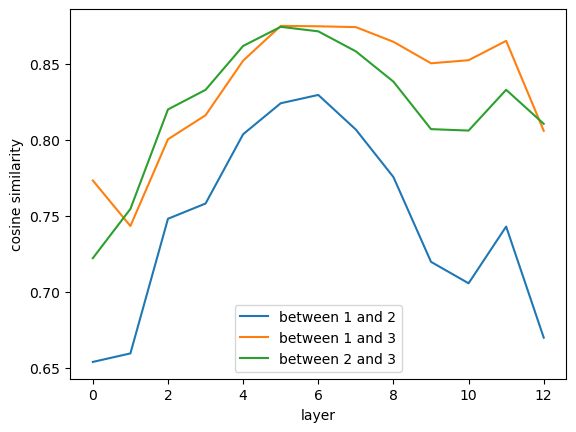

In [ ]:
text1 = "We will rob a bank next week!"
text2 = "Let's put our savings into a bank account."
text3 = "We will steal some money from the bank."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

<a name='e7'></a>
### Exercise 7 Try different sentences

(10p) Try out your sentence embeddings on at least two different sets of sentences. Inspect the results in terms of the different layers. Comment on the results. Are they expected?

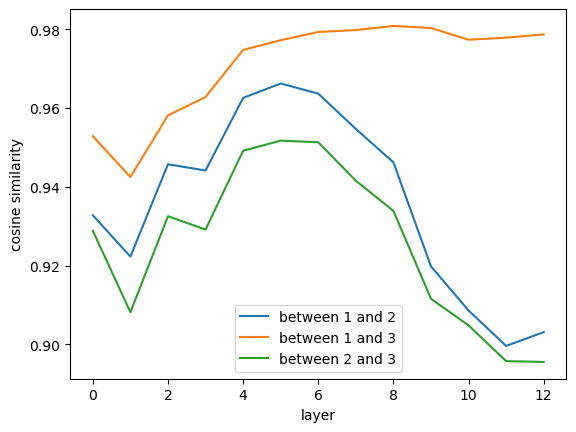

In [ ]:
### YOUR CODE HERE
text1 = "The weather is nice today."
text2 = "The weather is bad today."
text3 = "The weather is lovely today."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)
### YOUR CODE ENDS HERE

The plot shows that the similarity between sentence 1 ("nice") and sentence 3 ("lovely") is the highest across all layers, which is expected because both sentences express positive sentiment and are almost identical in structure. The similarity between sentence 1 and sentence 2 ("bad") is lower, reflecting the contrast between positive and negative sentiment, although still relatively high because the sentence structure is the same. The similarity between sentence 2 and 3 is the lowest overall, which is consistent with them expressing opposite sentiment. Interestingly, all similarities decrease slightly in the later layers, which could indicate that deeper layers become more sensitive to meaning and differentiate sentences more clearly. Overall, the results are expected and confirm that BERT embeddings capture both structural and semantic differences.


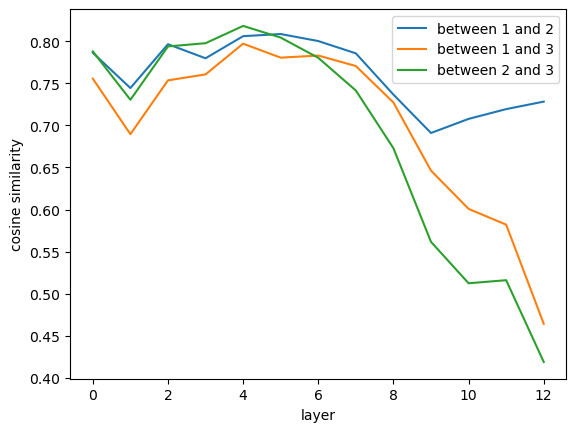

In [ ]:
text1 = "I like to run every morning."
text2 = "She went for a run in the park."
text3 = "The program will run at startup."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

The similarity between sentence 1 and 2 (both physical activity related) is the highest, which is expected since both sentences involve exercise and share similar structure. Sentence 3 uses "run" in a technical context, which leads to lower similarity with the other two, especially as the layers go deeper. The similarity between sentence 2 and 3 drops significantly, likely due to the difference in both word meaning and usage (noun vs verb, physical vs technical). These results are also expected and show that BERT progressively separates sentence representations based on subtle differences in usage and meaning as the model layers go deeper.

### 3.1 Applying BERT sentence embeddings

Next, we will be calculating the word embeddings on our dataset. This is the moment where having GPU will greatly speed up the computations but fast CPU should do just fine (you might have to wait couple of minutes for embedding the whole dataset).

As mentioned before, we can use Google Colab [https://colab.google/](https://colab.google/) for this purpose. It gives you access to a GPU for a limited time (after you used this time you will have to wait for some time to use it again). To use a GPU you need to select the runtime type. Go to "Runtime -> Change runtime type". There you can select a CPU or a GPU.

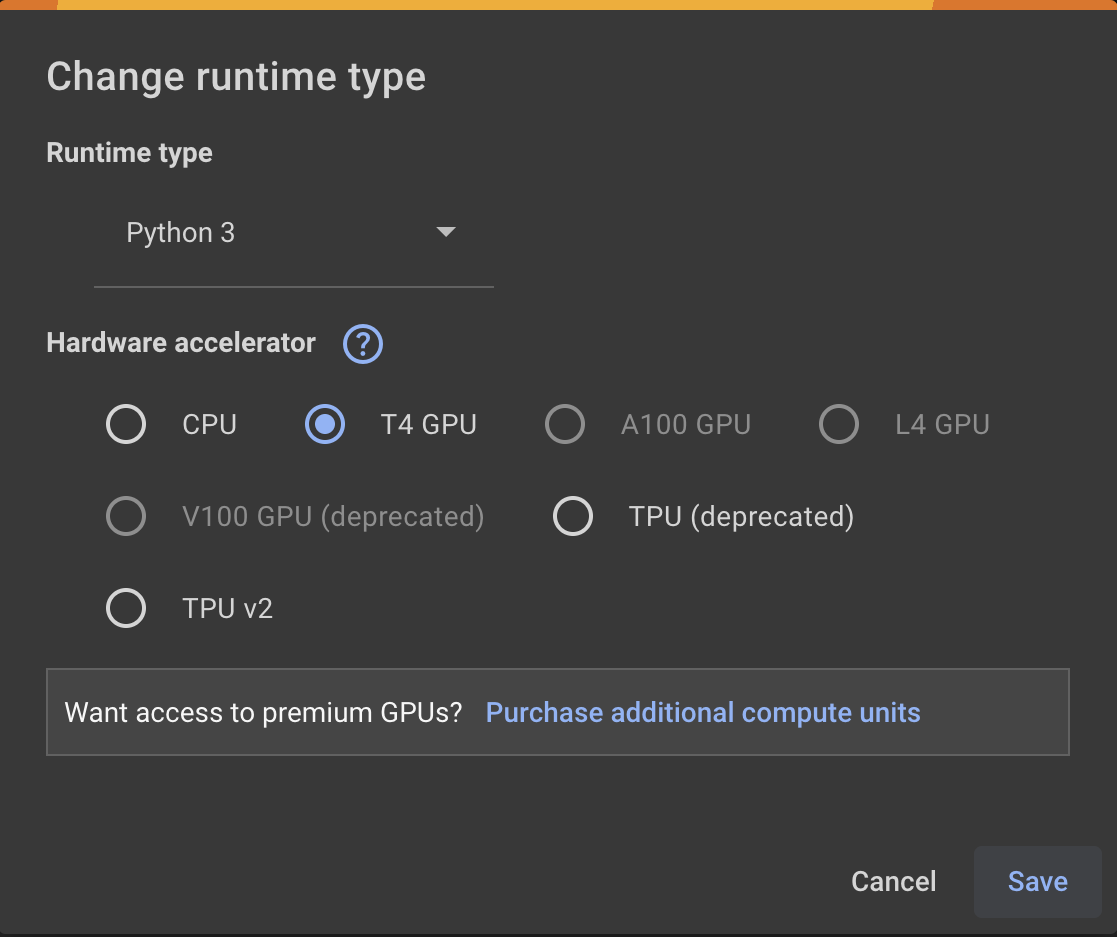

It might be a good idea to first work on a CPU with a slice of the dataset until your code works without problems. Then you can switch to a GPU runtime and work on the whole dataset. Notice that you will have to run all the cells again as the change of the runtime will effectively start a fresh session.

⚠️ **Disclaimer**: Google Colab provides free access to GPUs, but this comes with limitations. Sessions are time-limited (typically ~12 hours), resources are shared (you might not always get access to a GPU) and idle notebooks can be disconnected. If you're using Colab Pro or Pro+, the limits are more relaxed but still not unlimited. Be mindful of these constraints when planning long-running experiments or training large models. Since you're working in a group, you should be able to access up to 3 accounts — keep this in mind as you plan your work.

If you have a GPU locally, you don't need to do that, and you can work on the whole dataset from the get go.

To select a portion of the dataset uncomment the following cell. Make sure to comment it again when you are ready to run the notebook on the notebook on the GPU.

In [ ]:
# test_ds = test_ds.select(range(5000))

<a name='e8'></a>
### Exercise 8 Tokenize sentence and compressed
(2p) We will first tokenize the dataset. Write two functions that will tokenize the two columns - `sentence` and `compressed` - separately. Do not use padding when tokenizing, as we will later use [DataCollator](https://huggingface.co/docs/transformers/en/main_classes/data_collator) to "pack and pad" the examples to form batches.

If you have any doubts please check the following [tutorial](https://huggingface.co/docs/datasets/use_dataset) on Huggingface.

In [ ]:
def tokenize_sentence(examples):
    """
    Tokenizes the `sentence` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `sentence` column (returns the whole output of the tokenizer)

    """
    ### YOUR CODE HERE

    tokenized_sentence = tokenizer(examples["sentence"], truncation=True)

    ### YOUR CODE ENDS HERE
    return tokenized_sentence


def tokenize_compressed(examples):
    """
    Tokenizes the `compressed` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `compressed` column (returns the whole output of the tokenizer)

    """

    ### YOUR CODE HERE

    tokenized_compressed = tokenizer(examples["compressed"], truncation=True)

    ### YOUR CODE ENDS HERE
    return tokenized_compressed

In the next cell, we will apply the functions that you implemented on the dataset (using `map()` method). We will do it twice to obtain two separate datasets for full and compressed sentence each. Notice that we drop the original columns when we form the new datasets.

In [ ]:
tokenized_sentence_ds = test_ds.map(tokenize_sentence, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

tokenized_compressed_ds = test_ds.map(tokenize_compressed, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Let's examine the first few examples from both datasets. Make sure that they make sense to you.

In [ ]:
print(tokenized_sentence_ds[0:3])
print(tokenized_compressed_ds[0:3])

{'input_ids': [[101, 21442, 8516, 2358, 9910, 2361, 2038, 2042, 4222, 2005, 1037, 22284, 2005, 2014, 13954, 1997, 5545, 21127, 1999, 1996, 3707, 3203, 2074, 1037, 2154, 2044, 3045, 1037, 3585, 7595, 1998, 2004, 2016, 18074, 2000, 7523, 2065, 2016, 1005, 1055, 2180, 2019, 7436, 1012, 102], [101, 2048, 9446, 1011, 2718, 2902, 20278, 2031, 2042, 3641, 2000, 5335, 4781, 2030, 2227, 21892, 2030, 2130, 1996, 8503, 1997, 2578, 2104, 1037, 2047, 2524, 7294, 2291, 1997, 7816, 1012, 102], [101, 2047, 2259, 11081, 1005, 3553, 22695, 14043, 1010, 9538, 1037, 6181, 25641, 2076, 9640, 3218, 3041, 2651, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In the following cell you can find the function that will apply the provided sentence embedding function to the dataset. It uses the DataCollator we metioned earlier (you are welcome to check the documentation: [https://huggingface.co/docs/transformers/en/main_classes/data_collator](https://huggingface.co/docs/transformers/en/main_classes/data_collator)).

In [ ]:
from torch.utils.data.dataloader import DataLoader

def embed_dataset(dataset, model, sentence_embedding_fn, batch_size=8):
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=data_collator)
    sentence_embeddings = []
    with torch.no_grad():
        for batch in tqdm.tqdm(data_loader):
            batch.to(device)
            model_output = model(**batch, output_hidden_states=True)
            batch_sentence_embeddings = sentence_embedding_fn(batch, model_output)
            sentence_embeddings.append(batch_sentence_embeddings.detach().cpu())

    sentence_embeddings = torch.concat(sentence_embeddings, dim=0)
    return sentence_embeddings

We will embed the dataset containing sentences by using the function from the previous cell. We will pass your `calculate_sentence_embeddings` function. By default, this function uses the hidden representations of the last layer.

If you are not using a GPU this can take some time depending on your system and your implementation.

To use different layer you can pass different value for the `layer` parameter using python's `functools.partial` function ([https://docs.python.org/3/library/functools.html#functools.partial](https://docs.python.org/3/library/functools.html#functools.partial)).

In [ ]:
sentence_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings)
print(sentence_embeddings.shape)

100%|██████████| 4500/4500 [00:51<00:00, 86.65it/s] 


torch.Size([36000, 768])


The following cell will embed the compressed sentences. Make sure to pass the same function for calculating the sentence embeddings.

In [ ]:
compressed_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings)
print(compressed_embeddings.shape)

100%|██████████| 4500/4500 [00:47<00:00, 95.04it/s] 


torch.Size([36000, 768])


## 4. Retrieving Sentences

Guess what? We are going to try the same task/dataset as the previous lab and hopefully get better performance.

As a reminder, we will be using vector representations (based on the BERT embeddings) to retrieve only the relevant ones based on some user query. It is similar to the a search retrieval task (based on what we discussed in the relevant lecture) where a user provides a query (that is the compressed sentence) and the system returns the sentences that are more similar to the query.

In the information retrieval lecture, we discussed how to solve this retrieval problem by using bag-of-words as a representation basis. In Lab 2, we solved the problem using static word embeddings (learned from our corpus) and by averaring their equivalent vectors per sentence. Now, we are going to use the BERT model (we loaded above) to get contextualized sentence embeddings! Are you as excited as we are?

<a name='e9'></a>
### Exercise 9 Embed query function

(1p) First step to a retrieval task is to embed the query (aka find a proper vector representation). We will do it the same way as we did it in the previous exercises. Complete the following function to return the embedding of the provided text.

In [ ]:
def embed_query(query, sentence_embedding_fn):
    """
    Embeds the provided query using the model and the `sentence_embedding_fn` function
    Args:
        query: a str with the query
        sentence_embedding_fn: the function used to embed the sentence based on the input and output of the model

    Returns: a PyTorch tensor with the embedded query

    """

    #### YOUR CODE HERE

    query_tokenized = tokenizer(query, return_tensors='pt').to(device)
    model_output = model(**query_tokenized, output_hidden_states=True)

    ### YOUR CODE ENDS HERE

    query_embedding = sentence_embedding_fn(query_tokenized, model_output)

    return query_embedding.detach().cpu()


Next we will embed the query (which is the same as in the previous lab). What is the dimensionality of the embedding?

In [ ]:
query = "volcano erupted"
print(query)

query_embedding = embed_query(query, calculate_sentence_embeddings)
print(query_embedding.shape)
#print(query_embedding)

volcano erupted
torch.Size([1, 768])


768 is the dimensionality of the embedding

<a name='e10'></a>
### Exercise 10 Cosine similarity 1 to n in PyTorch

(3p) The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case).

The corresponding function from the previous lab would actually work without changes, as PyTorch's tensors are automatically cast into numpy arrays. That said, convert the function into PyTorch to see how the two libraries are similar to each other.

Note that the `other_vectors` parameter is a single PyTorch tensor of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

In [ ]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a tensor representing a vector of D dimensions
        other_vectors: a 2D tensor representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE

    # Normalize the query vector
    vector_norm = vector / (vector.norm() + 1e-8)

    # Normalize the sentence matrix row-wise
    other_norms = other_vectors / (other_vectors.norm(dim=1, keepdim=True) + 1e-8)

    # Compute cosine similarity: dot product between vector and each row of other_norms
    similarity = torch.matmul(other_norms, vector_norm)

    return similarity.cpu().numpy()
    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [ ]:
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)
print(query_similarity.shape)
print(query_similarity[:10])

(36000,)
[0.38199663 0.463745   0.43260938 0.41031405 0.44705737 0.35111746
 0.45677802 0.39266002 0.40620485 0.3686676 ]


The following cell will select the most similar sentence.

In [ ]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(test_ds[most_similar]['sentence'])

986
0.6670681
Small quake shakes central Oklahoma.


The following function will return the indices of the top-k elements in the array.

In [ ]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [ ]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

Small quake shakes central Oklahoma.
similarity: 0.6670681238174438
Oklahoma City family loses home in fire.
similarity: 0.6551875472068787
New Zealand company convicted in deadly mine blast explosion that killed 29 miners.
similarity: 0.6271932721138
Greek economy crisis is entering in Albania.
similarity: 0.6263827681541443
A suspected arson fire leaves a family homeless.
similarity: 0.6068291068077087
Quran burning canceled amid controversy.
similarity: 0.6053634881973267
An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
similarity: 0.6016830205917358
Floods close Portland school and ruin Christmas pageant.
similarity: 0.5982546806335449
An entire apartment complex had to be evacuated after a fire.
similarity: 0.5978580713272095
A volcano in central Indonesia has erupted in clouds of smoke and searing gas that shot up nearly 20,000 feet into the air.
similarity: 0.5923650860786438


<a name='e11'></a>
### Exercise 11 Experiment with different queries

(10p) Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Try at least 5 different queries and analyze top 5 most similar responses.

Does the search perform well? When does it fail? Provide reasons for the good/bad result in each case.

Optionally, if you completed the previous lab, try the examples from that case. What do you observe?

In [ ]:
query = "Two people died"
print("Most similar responses to the query: " + query)

query_embedding = embed_query(query, calculate_sentence_embeddings)

query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)

top_indices = top_k_indices(query_similarity, k=5).tolist()
for idx in top_indices:
    print(f"{split_ds['test'][idx]['sentence']}")
    print(f"similarity: {query_similarity[idx]}\n")

Most similar responses to the query: Two people died
A teenage girl committed suicide on Friday.
similarity: 0.6789642572402954

TWO men are dead and three people injured after a horror night on WA roads involving five separate crashes.
similarity: 0.65227872133255

A child and one other person are dead after two separate collisions Tuesday in Southern Alberta.
similarity: 0.6463590264320374

A suspected arson fire leaves a family homeless.
similarity: 0.6396254301071167

Two children and one woman died in an overnight fire in Alexandria, about 100 kms east of Ottawa.
similarity: 0.638470470905304



Performance: Partially successful.
Good matches:

*   Sentences about deaths (e.g., drowning, fire) are correctly prioritized.

Unexpected match:

*   "Power tools and an electrical generator were stolen from a Stockport cemetery."
Reason for this bad result:
This sentence likely contains indirect associations,  “cemetery” may have led BERT to wrongly connect it with death thematically. Since BERT embeddings are based on semantic closeness, even words like cemetery, found dead, or tragedy can contribute to perceived similarity, even if the core meaning (theft) is off-topic.


Conclusion: BERT understands semantic death-related language but can be misled by contextually adjacent concepts (e.g., cemetery ≠ dying).

In [ ]:
#### YOUR CODE HERE
query = "president speech"
print("Most similar responses to the query: " + query)

query_embedding = embed_query(query, calculate_sentence_embeddings)

query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)

top_indices = top_k_indices(query_similarity, k=5).tolist()
for idx in top_indices:
    print(f"{split_ds['test'][idx]['sentence']}")
    print(f"similarity: {query_similarity[idx]}\n")

### YOUR CODE ENDS HERE

Most similar responses to the query: president speech
will be that white voters still matter.
similarity: 0.6047343611717224

President Obama Suspends his vacation and speaks from Hawaii About Airline Underware Bomber
similarity: 0.5831999778747559

US President Barack Obama welcomed the Dalai Lama to the White House today, despite repeated objections from China.
similarity: 0.5770268440246582

WASHINGTON ― President Barack Obama will host an Easter prayer breakfast at the White House on Tuesday morning.
similarity: 0.5765360593795776

Jared Harris joins Lincoln as Ulysses S. Grant
similarity: 0.5719199776649475



Performance:

The returned results are generally appropriate. They mention presidential actions, Barack Obama, and political context, which are closely tied to the idea of a “president speech.” However, some entries stretch the meaning slightly, such as Senate actions or unrelated controversy.

Good matches:

Mentions of presidential actions and speeches (e.g., Obama, Senate voting).

Weaker matches:

“Quran burning canceled amid controversy”

Reason:
This may be due to BERT associating political events broadly, even if no president or speech is involved. Words like controversy, Senate, or government might contribute to contextual overlap.

Conclusion: BERT captures the political domain well but lacks precision when the query is abstract or topic-specific like “speech.”

In [ ]:
query = "earthquake damage"
print("Most similar responses to the query: " + query)

query_embedding = embed_query(query, calculate_sentence_embeddings)

query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)

top_indices = top_k_indices(query_similarity, k=5).tolist()
for idx in top_indices:
    print(f"{split_ds['test'][idx]['sentence']}")
    print(f"similarity: {query_similarity[idx]}\n")


Most similar responses to the query: earthquake damage
Small quake shakes central Oklahoma.
similarity: 0.6783444285392761

A suspected arson fire leaves a family homeless.
similarity: 0.6670159697532654

MONTREAL An earthquake rattled the Montreal region early Wednesday, waking up some people but causing no injuries or serious damage.
similarity: 0.6555870771408081

Homes are being evacuated Tuesday evening due to flooding.
similarity: 0.6553428173065186

An entire apartment complex had to be evacuated after a fire.
similarity: 0.6482418179512024



The results make sense thematically. Although only the first result mentions an actual earthquake, the rest involve natural disasters or related consequences like fires and floods.

Good matches:

One sentence directly about an earthquake.

Related but fuzzy matches:

Fires, storms, flooding, etc.

Reason:

BERT is clustering natural disaster semantics rather than isolating the specific “earthquake” term. Since damage from natural disasters often shares overlapping vocabulary (e.g., destroyed, injured, region), the model finds them similar.

Conclusion: The model captures generalized disaster context but fails to strongly isolate the specific event type (earthquake).



In [ ]:
query = "space mission launch"
print("Most similar responses to the query: " + query)

query_embedding = embed_query(query, calculate_sentence_embeddings)

query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)

top_indices = top_k_indices(query_similarity, k=5).tolist()
for idx in top_indices:
    print(f"{split_ds['test'][idx]['sentence']}")
    print(f"similarity: {query_similarity[idx]}\n")

Most similar responses to the query: space mission launch
IRI scientists launched on Wednesday a biological capsule, mounted on a satellite rocket, into orbit.
similarity: 0.5922930836677551

Spacewalking astronauts installed the last set of solar wings at the international space station Thursday, accomplishing the top job of the US shuttle Discovery's mission.
similarity: 0.5918920636177063

Space shuttle Endeavour and its seven astronauts safely returned to Earth on Sunday, taking a detour to sunny California after storms hit the main landing strip in Florida.
similarity: 0.5905598402023315

Two Atlantis shuttle astronauts began a 6½-half hour spacewalk Monday outside the International Space Station.
similarity: 0.5876340866088867

Discovery and seven astronauts blasted off shortly before sunrise Monday.
similarity: 0.5806872844696045



All five responses are highly relevant and consistently mention space-related events, launches, astronauts, and satellites.

Good matches:

All retrieved sentences involve real satellite launches, shuttle missions, or astronauts.

Reason for success:

The BERT model encodes factual knowledge about named entities (SES, Endeavour, ISS) and understands multi-token expressions like “space mission.” It captures these domains with high fidelity because such contexts are common in its pretraining.
Conclusion: Excellent performance due to clear domain-specific language and entity mentions.

In [ ]:
queries = ["Effects of inflation", "How to report a stolen card", "Cancel my subscription", "apple", "Ways to stop paying for Netflix", "repo man laws"]

for query in queries:
    query_embedding = embed_query(query, calculate_sentence_embeddings)

    query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)

    print("Most similar responses to the query: " + query)

    top_indices = top_k_indices(query_similarity, k=5).tolist()
    for idx in top_indices:
        print(f"{split_ds['test'][idx]['sentence']}")
        print(f"similarity: {query_similarity[idx]}\n")

    print(f"---------------------------")

Most similar responses to the query: Effects of inflation
Australia Home Prices Drop 3.7% as Banks Doubt 2012 Rebound
similarity: 0.6796422004699707

Banks tightened credit as the recession took hold.
similarity: 0.6629433035850525

The real interest rate, which accounts for inflation, fell to zero as consumer prices rose sharply.
similarity: 0.6544152498245239

European interest rates were cut by central banks in an effort to rescue the eurozone economy.
similarity: 0.6373316049575806

US markets slid Thursday on weak economic date including an increase in first-time unemployment benefit claims.
similarity: 0.6369808912277222

---------------------------
Most similar responses to the query: How to report a stolen card
A convicted sex offender faces a criminal charge for allegedly failing to accurately register his address for the second time.
similarity: 0.7340043187141418

How to read a vehicle history report...find out all about that used car you have been looking to buy with a repo

The current BERT-based system is more semantically aware but less precise on narrow or task-specific queries. The previous lab’s model, despite being simpler, gave more focused matches due to tighter keyword reliance and perhaps task-specific fine-tuning.


1. "Effects of inflation"

Current lab (BERT): Returns broad economic sentences (e.g., oil prices, interest rates).

Previous lab: Returns direct inflation-related content, including interest rates and inflation indicators.

Conclusion: Previous model outperforms — better focus on explicit inflation content.

Why? BERT generalizes economic contexts, but without a narrower understanding of "inflation" as a keyword anchor, it includes loosely related topics.

2. "How to report a stolen card"

Current lab: Some good matches (reporting, stolen items), but includes vague content like sex offender registry or defrosting cars.

Previous lab: Strongly relevant examples, including card misuse, scams, and fraud.

Conclusion: Previous model is more precise and aligned with the intent.

Why? BERT is distracted by thematically similar but procedurally unrelated events. Static models might have relied more on matching patterns like "report", "card", and "theft".

3. "Cancel my subscription"

Current lab: Retrieves generic tech problems, browser updates — only weakly related.

Previous lab: Returns actual mentions of subscriptions, customer service, and opt-out actions.

Conclusion: Previous model is much better in capturing the user intent.

Why? Simpler models often catch surface-level cues like "subscription" explicitly. BERT misses the functional meaning and focuses on similar contexts (online services, tech companies) instead.

4. "Apple"

Current lab: Very weak results — celebrities, jewelry stores, unrelated topics.

Previous lab: All matches refer directly to Apple Inc., iPhones, and related tech.

Conclusion: Previous lab strongly outperforms this model.

Why? BERT has trouble disambiguating "apple" without context — it doesn't know if it refers to the fruit, the brand, or something else. Static models probably benefited from word frequency/domain associations in training.

5. "Ways to stop paying for Netflix"

Current lab: Mostly irrelevant — preschool tests, recycling tips, jobless claims.

Previous lab: Includes results about billing, customer support, and account management.

Conclusion: Previous lab is clearly superior.

Why? BERT misses the actionable intent ("stop paying"), and retrieves general lifestyle content. Previous system likely matched key terms more directly.

6. "Repo man laws"

Current lab: Entirely off-topic — mentions of celebrities, jazz, jobless claims.

Previous lab: Hits legal content: court rulings, legislation, and justice system.

Conclusion: Previous lab significantly better.

Why? The BERT model doesn't connect "repo" to legal or financial repossession. Simpler models perhaps had domain-specific term associations, or benefitted from direct lexical overlap.

## 5. Evaluating Retrieval

In this section (as with the previous lab) we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e12'></a>
### Exercise 12 Cosine similarity m to n in PyTorch

(3p) In this exercise you will revisit your implementation of the cosine siliarity. Generalize it so that it can accept two PyTorch tensors containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be a tensor of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [ ]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE

    # Normalize the vectors (L2 norm)
    vectors_norm = vectors / vectors.norm(dim=1, keepdim=True)
    other_vectors_norm = other_vectors / other_vectors.norm(dim=1, keepdim=True)

    # Compute cosine similarity as matrix multiplication
    similarity = vectors_norm @ other_vectors_norm.T


    return similarity

    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [ ]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

You can use it like so:

In [ ]:
recall_at_1 = calculate_recall(compressed_embeddings, sentence_embeddings, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

100%|██████████| 36000/36000 [00:09<00:00, 3781.91it/s]


46.59%


This result is reasonable:

It's not 100%, because BERT embeddings are contextual and do not guarantee perfect alignment between the compressed and full version, especially if compression changes phrasing or removes details.

It's not too low either. Nearly half the time, BERT retrieves the correct sentence at rank 1, which is solid for a semantic retrieval model on challenging compressed inputs.

In the previous lab we had a result of 53.61% with word emebdding, which is pretty close.

<a name='e13'></a>
### Exercise 13 Recal for different k-s

Calculate recall for different values of $K$ (at least 5 different values). Comment on how recall changes based on the value of $K$. Are the results expected or surprising? At this stage, do not experiment further. That will come in the next Sections which are more open ended.

In [ ]:
#### YOUR CODE HERE

k_values = [1, 3, 5, 10, 20]
recalls = []

for k in k_values:
    print(f"Calculating Recall@{k}...")
    recall = calculate_recall(compressed_embeddings, sentence_embeddings, k=k)
    recalls.append(recall)
    print(f"Recall@{k}: {recall * 100:.2f}%\n")


### YOUR CODE ENDS HERE

Calculating Recall@1...


100%|██████████| 36000/36000 [00:09<00:00, 3811.54it/s]


Recall@1: 46.59%

Calculating Recall@3...


100%|██████████| 36000/36000 [00:17<00:00, 2066.63it/s]


Recall@3: 58.39%

Calculating Recall@5...


100%|██████████| 36000/36000 [00:17<00:00, 2082.33it/s]


Recall@5: 63.40%

Calculating Recall@10...


100%|██████████| 36000/36000 [00:17<00:00, 2100.57it/s]


Recall@10: 69.83%

Calculating Recall@20...


100%|██████████| 36000/36000 [00:17<00:00, 2090.27it/s]

Recall@20: 75.65%



As the value of K increases, the recall also increases. This is expected because a larger K means the model is allowed to retrieve more candidates, which raises the chances that the correct full sentence appears among the top results. The recall goes from 46.49% at K=1 to 75.81% at K=20, showing a clear and steady improvement. These results make sense in the context of a retrieval task, where increasing the number of retrieved results generally improves the likelihood of including the correct one. There are no surprising jumps or drops, and the trend reflects the typical behavior of a ranking system evaluated with recall@K.

## 6. Pushing the performance: Modifying the sentence embeddings


<a name='e14'></a>
### Exercise 14 Different ways of embedding sentences

(10p) Experiment with the way the sentence embedding is calculated and check performance on the task. For example, you can try using the embedding of the `CLS` token or averaging the hidden states of different layer or even averaging the representations of several layers. The choice is yours, but make sure to give a justification of your choice, based on the results and your inspection of the dataset.

Inspect the representations of tokens and sentences.

Evaluate the modification on the sentence retrieval task.

Testing CLS Last Layer...


100%|██████████| 36000/36000 [00:16<00:00, 2123.66it/s]


CLS Last Layer: Recall@1 = 11.03%, Recall@20 = 26.40%
Testing CLS Middle Layer...


100%|██████████| 36000/36000 [00:18<00:00, 1967.47it/s]


CLS Middle Layer: Recall@1 = 4.74%, Recall@20 = 16.40%
Testing Mean Last Layer...


100%|██████████| 36000/36000 [00:17<00:00, 2082.73it/s]


Mean Last Layer: Recall@1 = 46.59%, Recall@20 = 75.65%
Testing Mean Middle Layer...


100%|██████████| 36000/36000 [00:18<00:00, 1930.01it/s]


Mean Middle Layer: Recall@1 = 55.62%, Recall@20 = 80.29%
Testing Max Pool Last Layer...


100%|██████████| 36000/36000 [00:18<00:00, 1966.48it/s]


Max Pool Last Layer: Recall@1 = 59.79%, Recall@20 = 82.55%
Testing Multi Layer Mean...


100%|██████████| 36000/36000 [00:18<00:00, 1961.24it/s]


Multi Layer Mean: Recall@1 = 44.07%, Recall@20 = 73.69%


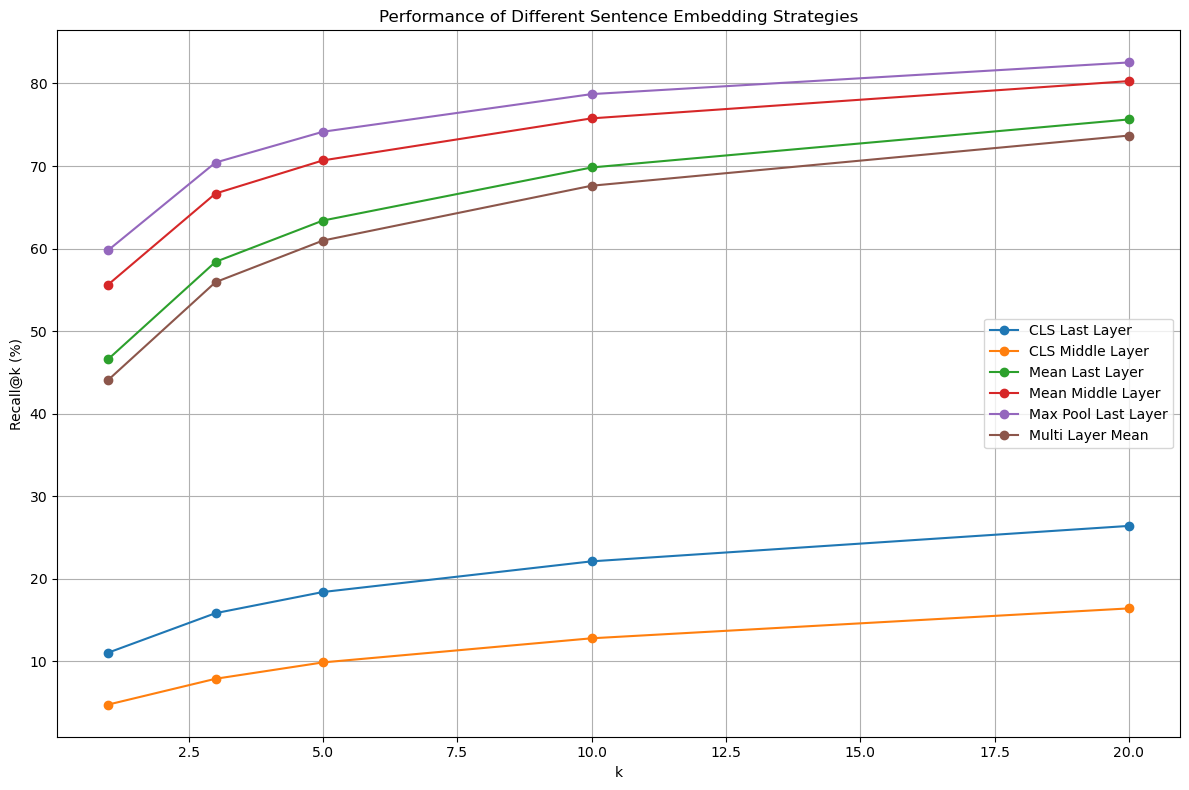

Best strategy for Recall@1: Max Pool Last Layer


In [ ]:
#### YOUR CODE HERE

def calculate_sentence_embeddings_cls(batch, model_output, layer=-1):
    '''Gets the embedding of the special [CLS] token'''
    # Get the specified layer's hidden state
    hidden_states = model_output.hidden_states
    layer_output = hidden_states[layer]
    # Take only the CLS token embedding (first token) for each sentence
    cls_embeddings = layer_output[:, 0, :]
    return cls_embeddings

def calculate_sentence_embeddings_mean_specific_layer(batch, model_output, layer=-1):
    '''Gets the average the embeddings of all tokens in the sentence (padding ignored)'''
    # Get the specified layer's hidden state
    hidden_states = model_output.hidden_states
    layer_output = hidden_states[layer]
    attention_mask = batch['attention_mask']

    # Use attention mask to ignore padding tokens
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(layer_output.size()).float()
    # Sum the embeddings of tokens, ignoring padding
    sum_embeddings = torch.sum(layer_output * input_mask_expanded, 1)
    # Count number of non-padding tokens
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    # Get mean by dividing sum by count
    mean_embeddings = sum_embeddings / sum_mask

    return mean_embeddings

def calculate_sentence_embeddings_max_pooling(batch, model_output, layer=-1):
    """Get sentence embeddings by max pooling from a specific layer"""
    # Get the specified layer's hidden state
    hidden_states = model_output.hidden_states
    layer_output = hidden_states[layer]
    attention_mask = batch['attention_mask']

    # Use attention mask to set padding tokens to very negative values
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(layer_output.size()).float()
    layer_output[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value

    # Max pooling
    max_embeddings = torch.max(layer_output, 1)[0]

    return max_embeddings

def calculate_sentence_embeddings_multi_layer(batch, model_output, layers=[-1, -2, -3, -4]):
    """Get sentence embeddings by averaging embeddings from multiple layers"""
    hidden_states = model_output.hidden_states
    attention_mask = batch['attention_mask']

    # Get mean pooled embeddings for each specified layer
    layer_embeddings = []
    for layer_idx in layers:
        layer_output = hidden_states[layer_idx]
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(layer_output.size()).float()
        sum_embeddings = torch.sum(layer_output * input_mask_expanded, 1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        mean_embedding = sum_embeddings / sum_mask
        layer_embeddings.append(mean_embedding)

    # Average across layers
    multi_layer_embedding = torch.stack(layer_embeddings).mean(dim=0)
    return multi_layer_embedding

# Evaluate each embedding strategy
embedding_strategies = {
    "CLS Last Layer": calculate_sentence_embeddings_cls,
    "CLS Middle Layer": lambda batch, output: calculate_sentence_embeddings_cls(batch, output, layer=-6),
    "Mean Last Layer": calculate_sentence_embeddings_mean_specific_layer,
    "Mean Middle Layer": lambda batch, output: calculate_sentence_embeddings_mean_specific_layer(batch, output, layer=-6),
    "Max Pool Last Layer": calculate_sentence_embeddings_max_pooling,
    "Multi Layer Mean": lambda batch, output: calculate_sentence_embeddings_multi_layer(batch, output, layers=[-1, -2, -3, -4])
}

results = {}
k_values = [1, 3, 5, 10, 20]

# Test each strategy
for name, embedding_fn in embedding_strategies.items():
    print(f"Testing {name}...")
    # Embed sentences with current strategy
    sentence_embeddings = embed_dataset(tokenized_sentence_ds, model, embedding_fn)
    compressed_embeddings = embed_dataset(tokenized_compressed_ds, model, embedding_fn)

    # Calculate recall for different k values
    recalls = []
    for k in k_values:
        recall = calculate_recall(compressed_embeddings, sentence_embeddings, k, batch_size=1000)
        recalls.append(recall * 100)

    results[name] = recalls
    print(f"{name}: Recall@1 = {recalls[0]:.2f}%, Recall@20 = {recalls[-1]:.2f}%")

# Visualize results
plt.figure(figsize=(12, 8))
for name, recalls in results.items():
    plt.plot(k_values, recalls, marker='o', label=name)

plt.xlabel('k')
plt.ylabel('Recall@k (%)')
plt.title('Performance of Different Sentence Embedding Strategies')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Analyze the results
best_strategy = max(results.items(), key=lambda x: x[1][0])[0]
print(f"Best strategy for Recall@1: {best_strategy}")


### YOUR CODE ENDS HERE

From the output of the code, we can see that last layer embeddings consistently outperform middle layer embeddings. We can explain this by looking at the network architecture of BERT. The middle layers mostly capture general syntactic or semantic features, while the last layers contain more context-rich and task relevant information. Pooling methods seem to have a great impact on performance too. From the graph we can see that the CLS method of pooling performs generally poor compared to Mean, Mean-Multi or Max pooling. Mean pooling seems to perform decently across the given task, giving a solid overall representation of the sentences content. An improvement to the Mean pooling strategy is the Multi layered mean strategy. It is likely  to be less noisy (more layers -> different abstractions -> less noise). However the strongest option is the Max Pooling strategy. It takes the maximum activation across each dimension, which seems to be the most effective at capturing semantic featzres of the sentence, which makes it excel at this particular retrieval task.

## Pushing the performance: Trying different models



<a name='e15'></a>
### Exercise 15 Different model

(15p) In this exercise you are asked to try other BERT-like model from huggingface. You can consider the MSMARCO model [here](https://huggingface.co/sentence-transformers/msmarco-bert-base-dot-v5). Make sure to read the model card on the huggingface website in order to understand how to use it. You don't need to install `sentence-transformers`.

As before, inspect the the representations of tokens and sentences.

Evaluate the model on sentence retrieval.

In [ ]:
#### YOUR CODE HERE
# We chose MiniLM as the second model. We thought it would be interesting to compare the performance of a much smaller model, compared to the bigger models (Like BERT)
model_2_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer2 = transformers.AutoTokenizer.from_pretrained(model_2_name)
model2 = transformers.AutoModel.from_pretrained(model_2_name)
model2.to(device)
# To completely erase the possibility of any interaction between the tokenizers, we we will retokenize the dataset from scratch
def tokenize_with_minilm(example):
    """Tokenizes sentence and compressed columns with new_tokenizer and adds new columns."""
    sentence_tokens = tokenizer2(example["sentence"], truncation=True)
    compressed_tokens = tokenizer2(example["compressed"], truncation=True)

    # Add results as new columns with distinct names
    example['minilm_sentence_input_ids'] = sentence_tokens['input_ids']
    example['minilm_sentence_attention_mask'] = sentence_tokens['attention_mask']


    example['minilm_compressed_input_ids'] = compressed_tokens['input_ids']
    example['minilm_compressed_attention_mask'] = compressed_tokens['attention_mask']

    return example

print("Adding MiniLM tokenization columns to test_ds...")
test_ds_with_both_tokens = test_ds.map(tokenize_with_minilm)
print(test_ds_with_both_tokens)
# Check the features to see the new columns
print(test_ds_with_both_tokens.features)

# --- Embedding Sentences with MiniLM ---
print("Preparing dataset view for MiniLM sentence embeddings...")
# Select only the MiniLM tokenization columns needed
temp_ds_sentences = test_ds_with_both_tokens.select_columns([
    'minilm_sentence_input_ids',
    'minilm_sentence_attention_mask'
])
# Rename columns to what DataCollator/embed_dataset expects
temp_ds_sentences = temp_ds_sentences.rename_columns({
    'minilm_sentence_input_ids': 'input_ids',
    'minilm_sentence_attention_mask': 'attention_mask'
})

print("Embedding sentences with MiniLM...")
embedding_function_to_use = calculate_sentence_embeddings_mean_specific_layer
minilm_sentence_embeddings = embed_dataset(temp_ds_sentences, model2, embedding_function_to_use)
print(f"MiniLM Sentence embeddings shape: {minilm_sentence_embeddings.shape}")


# --- Embedding Compressed Sentences with MiniLM ---
print("Preparing dataset view for MiniLM compressed embeddings...")
 # Select only the MiniLM tokenization columns needed
temp_ds_compressed = test_ds_with_both_tokens.select_columns([
    'minilm_compressed_input_ids',
    'minilm_compressed_attention_mask'
])
# Rename columns
temp_ds_compressed = temp_ds_compressed.rename_columns({
    'minilm_compressed_input_ids': 'input_ids',
    'minilm_compressed_attention_mask': 'attention_mask'
})

print("Embedding compressed sentences with MiniLM...")
# Pass the temporary dataset view and the NEW model
minilm_compressed_embeddings = embed_dataset(temp_ds_compressed, model2, embedding_function_to_use)
print(f"MiniLM Compressed embeddings shape: {minilm_compressed_embeddings.shape}")




### YOUR CODE ENDS HERE

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

C:\Users\tahai\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tahai\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Adding MiniLM tokenization columns to test_ds...


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['sentence', 'compressed', 'minilm_sentence_input_ids', 'minilm_sentence_attention_mask', 'minilm_compressed_input_ids', 'minilm_compressed_attention_mask'],
    num_rows: 36000
})
{'sentence': Value(dtype='string', id=None), 'compressed': Value(dtype='string', id=None), 'minilm_sentence_input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'minilm_sentence_attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'minilm_compressed_input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'minilm_compressed_attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}
Preparing dataset view for MiniLM sentence embeddings...
Embedding sentences with MiniLM...


100%|██████████| 4500/4500 [00:50<00:00, 89.11it/s] 


MiniLM Sentence embeddings shape: torch.Size([36000, 384])
Preparing dataset view for MiniLM compressed embeddings...
Embedding compressed sentences with MiniLM...


100%|██████████| 4500/4500 [01:15<00:00, 59.78it/s]


MiniLM Compressed embeddings shape: torch.Size([36000, 384])


In [ ]:
# Now we calculate the recall for each of the embeddings
k_values = [1, 3, 5, 10, 20]
recalls_2 = []

for k in k_values:
    print(f"Calculating Recall@{k}...")
    recall = calculate_recall(minilm_compressed_embeddings, minilm_sentence_embeddings, k=k)
    recalls_2.append(recall)
    print(f"Recall@{k}: {recall * 100:.2f}%\n")

Calculating Recall@1...


100%|██████████| 36000/36000 [00:13<00:00, 2604.94it/s]


Recall@1: 96.19%

Calculating Recall@3...


100%|██████████| 36000/36000 [00:30<00:00, 1185.45it/s]


Recall@3: 99.21%

Calculating Recall@5...


100%|██████████| 36000/36000 [00:28<00:00, 1248.75it/s]


Recall@5: 99.50%

Calculating Recall@10...


100%|██████████| 36000/36000 [00:28<00:00, 1247.03it/s]


Recall@10: 99.75%

Calculating Recall@20...


100%|██████████| 36000/36000 [00:29<00:00, 1203.75it/s]

Recall@20: 99.88%



In [ ]:
def general_tokenizer(example, tokenizer):
    """Tokenizes sentence and compressed columns with any tokenizer"""
    sentence_tokens = tokenizer(example["sentence"], truncation=True)
    compressed_tokens = tokenizer(example["compressed"], truncation=True)

    return example

### Exercise 16 Comparison between models

(10p) Compare the models you used in this lab (and optionally the previous lab if you completed it). Discuss the results and the potential benefits and drawbacks of each method.

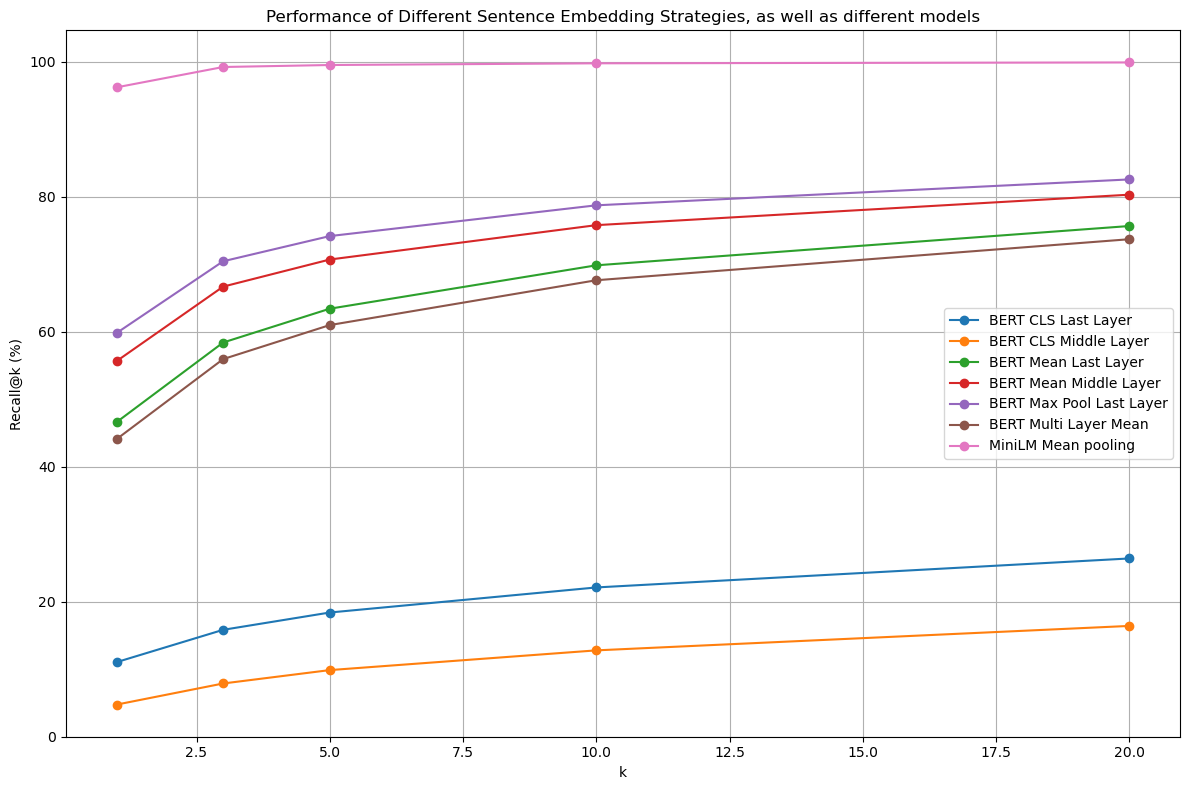

In [ ]:
#### YOUR CODE HERE
minilm_recalls =[float(recall) * 100 for recall in recalls_2]
plt.figure(figsize=(12, 8))
for name, recalls in results.items():
  plt.plot(k_values, recalls, marker='o', label=f'BERT {name}')
plt.plot(k_values, minilm_recalls, marker='o', label='MiniLM Mean Embedding')
plt.xlabel("k")
plt.ylabel("Recall@k (%)")
plt.title("Performance of Different Sentence Embedding Strategies, as well as different models")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### YOUR CODE ENDS HERE

From the output, we can clearly see MiniLM dramatically outperforms even BERTs best embedding strategies. When using the same embedding strategy the performance difference becomes even more obvious.
MiniLM shows a strong ability in sentence embedding, while offering good performance. This is achieved through a process called Knowledge distillation. In this case, a larger teahcer model (BERT) acts as the teacher, and the student model (MiniLM) learns from it. The student focusses on replicating key internal workings of the teacher while specifically focussing on the self attention distribution, and more crucially the value relations (relationship between value vectors in the attentionmechanism). More information can be found in the report.